<a href="https://colab.research.google.com/github/MrKarn/StockVision-AI-Powered-Market-Prediction/blob/main/Stock_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dgawlik_nyse_path = kagglehub.dataset_download('dgawlik/nyse')

print('Data source import complete.')


100%|██████████| 30.7M/30.7M [00:00<00:00, 85.6MB/s]

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Hello Guys
I are going make stock price prediction model using LSTM ,ANN, CNN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
!pip install kagglehub
import kagglehub


In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dgawlik/nyse")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dgawlik/nyse/versions/3


In [12]:
import kagglehub
import os
import pandas as pd

# Download latest version
dataset_path = kagglehub.dataset_download("dgawlik/nyse")

# Construct the full file path
file_path = os.path.join(dataset_path, "prices-split-adjusted.csv")  # Assuming file is in the dataset root

# Read the CSV file
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

print('Data source import complete.')

Data source import complete.


In [13]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [14]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [15]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

date 		-	 0.0
symbol 		-	 0.0
open 		-	 0.0
close 		-	 0.0
low 		-	 0.0
high 		-	 0.0
volume 		-	 0.0


<Axes: >

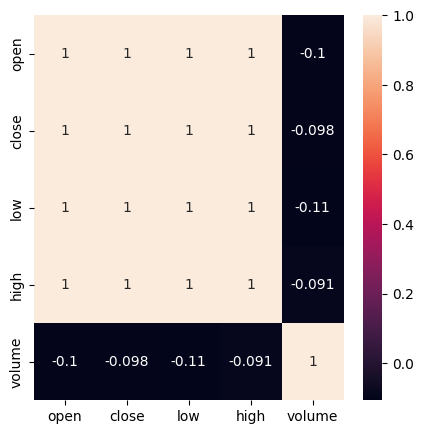

In [17]:
df = df[df['symbol']=='AAP']   # Choosin stock values for any company

# Select only numeric features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

cormap = numerical_df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [18]:
def get_corelated_col(cor_dat, threshold):
  # Cor_data to be column along which corelation to be measured
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [19]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


In [20]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [21]:
df.shape

(1762, 4)

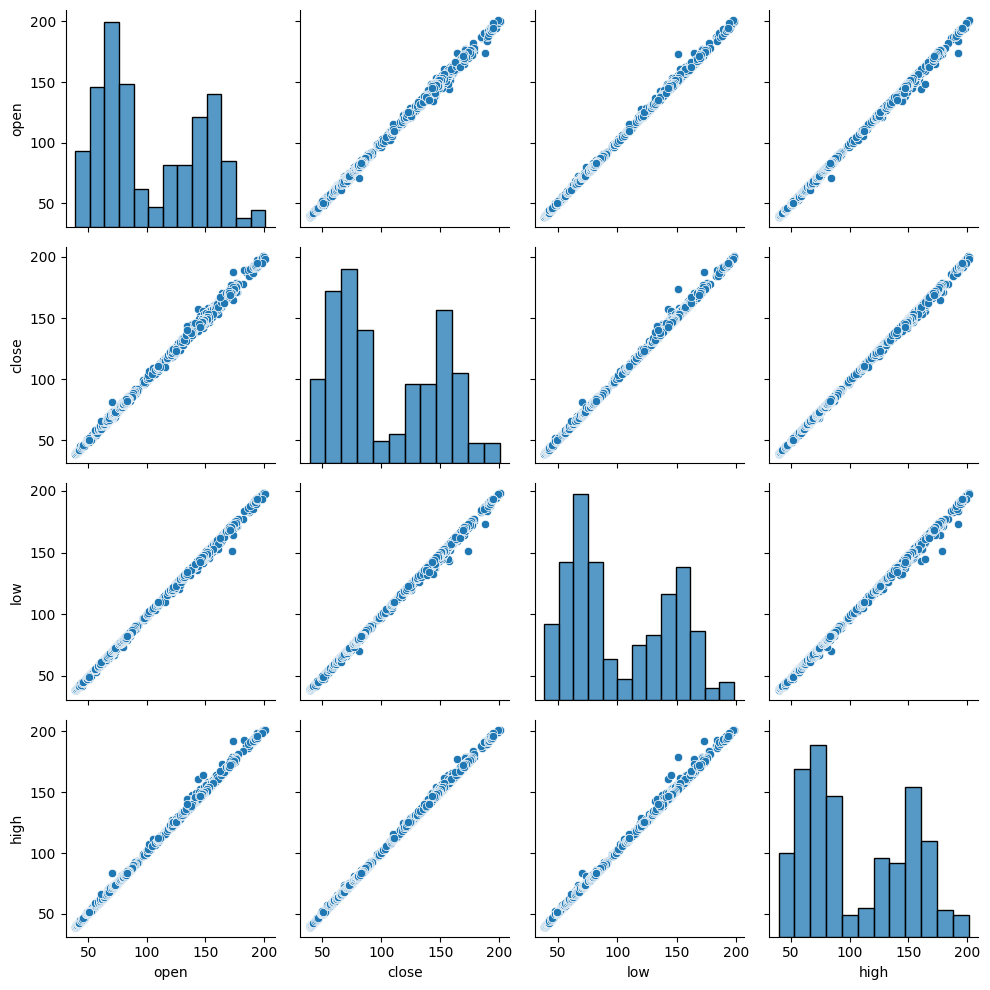

In [22]:
sns.pairplot(df)
plt.tight_layout()

In [23]:
X = df.drop(['close'], axis=1)
y = df['close']

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


# Prediction model

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

# 1. Linear regression

In [26]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [28]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


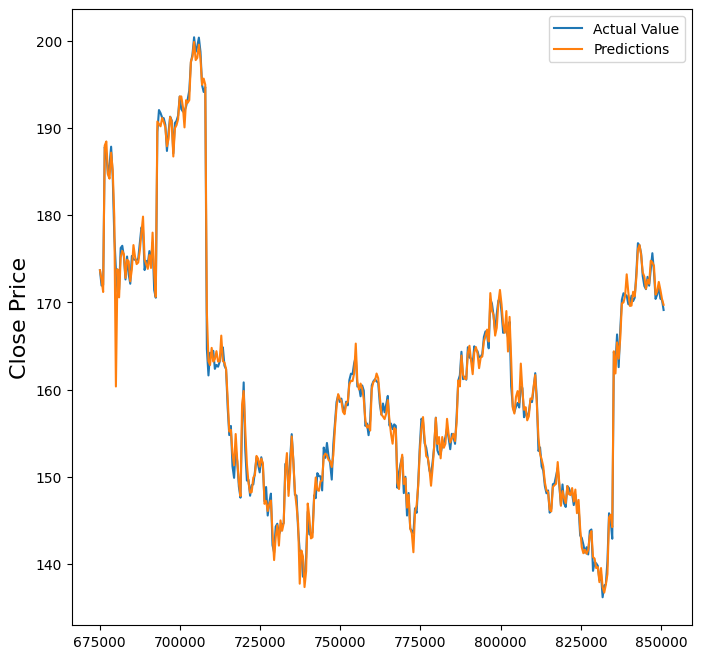

In [29]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 2. ANN

In [30]:
from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):

    model = Sequential()

    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [31]:
model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)


Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6006.1572 - val_loss: 22083.0430
Epoch 2/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6028.5376 - val_loss: 21979.6250
Epoch 3/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6096.4961 - val_loss: 21448.1836
Epoch 4/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5910.1626 - val_loss: 19676.3965
Epoch 5/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5065.8062 - val_loss: 15604.0020
Epoch 6/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3558.2288 - val_loss: 9079.6865
Epoch 7/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1726.5415 - val_loss: 2869.1084
Epoch 8/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 322.1859 - val_loss: 467.2101
Epoch 9/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.7989 - val_loss: 200.1175
Epoch 10/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.7580 - val_loss: 201.7017
Epoch 11/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.1139 - val_loss: 194.5658
Epoch 12/70
36/36 ━━━━━━━

In [32]:
y_pred_2 = model_2.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [33]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.066299
675608,171.919998,172.391968
676105,172.000000,170.624283
676602,187.789993,179.707809
677099,187.029999,188.142151


In [34]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9879420881358848


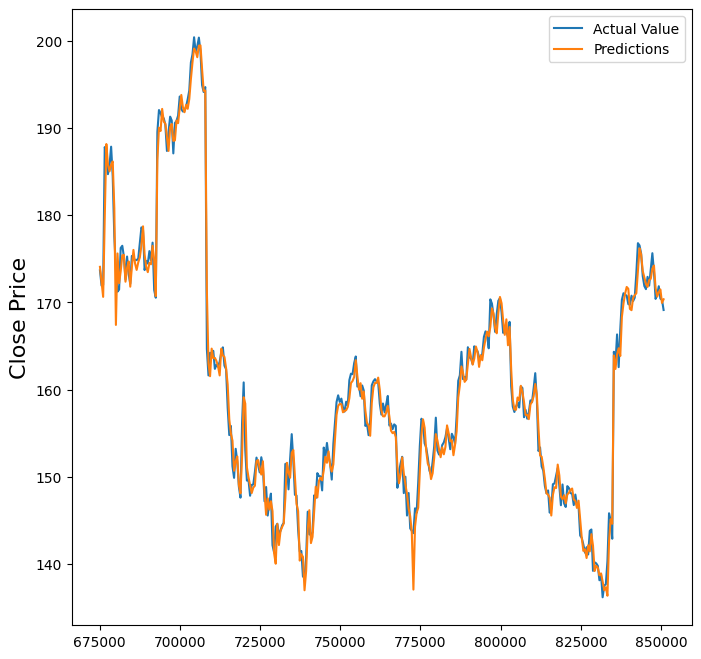

In [35]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 3. CNN

In [36]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():

    model = Sequential()

    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [38]:
model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5988.5679 - val_loss: 16243.0586
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2141.7571 - val_loss: 956.0662
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.2816 - val_loss: 43.7377
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4011 - val_loss: 37.7679
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6280 - val_loss: 11.9369
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5021 - val_loss: 5.6749
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8784 - val_loss: 2.3660
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7313 - val_loss: 1.9499
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4442 - val_loss: 1.8893
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4582 - val_loss: 1.9516
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5265 - val_loss: 1.8545
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

In [39]:
y_pred_3 = model_3.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [40]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,175.700638
675608,171.919998,174.030426
676105,172.000000,172.149780
676602,187.789993,179.979355
677099,187.029999,189.892288


In [41]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9818017930883156


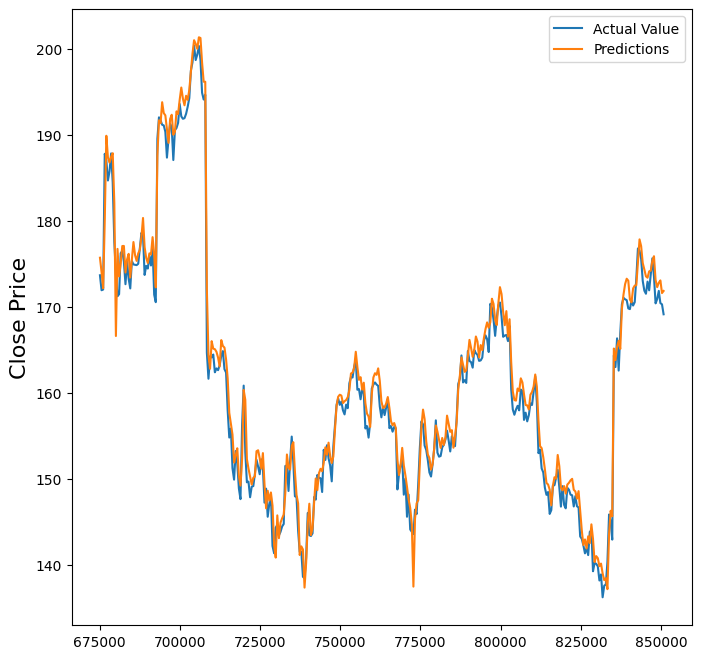

In [42]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

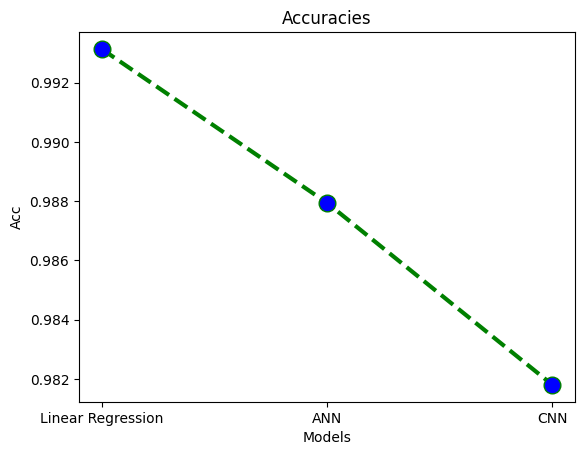

In [43]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

Now converting data into time series data and applying some more models.

In [44]:
close = df.reset_index()['close']
close.head()

,close
0,40.380001
1,40.139999
2,40.490002
3,40.480000
4,40.639999


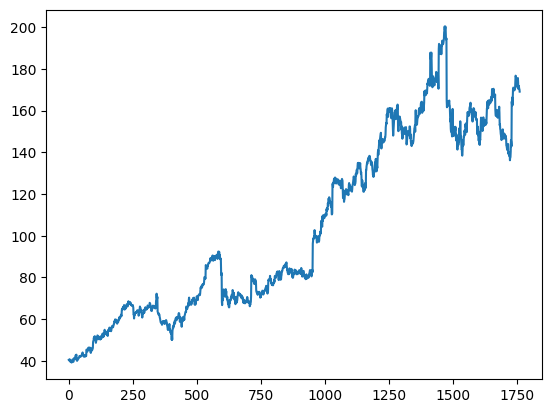

In [45]:
plt.plot(close)
plt.show()


In [46]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [47]:
X[:5]

array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

In [48]:
y[:5]

array([42.880001, 40.150002, 40.      , 40.240002, 40.220001])

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


# Prediction

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

# 1.LSTM

In [51]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [52]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()

    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [53]:
model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5900.6343 - val_loss: 867.4230
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 334.7833 - val_loss: 304.6138
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 23.4189 - val_loss: 46.5689
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.4134 - val_loss: 40.4049
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 17.3497 - val_loss: 48.9377
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13.8765 - val_loss: 42.6117
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13.8976 - val_loss: 39.5298
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 15.2149 - val_loss: 38.5113
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 15.3591 - val_loss: 41.2923
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14.0259 - val_loss: 35.3488
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.1708 - val_loss: 61.6107
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━

In [54]:
y_pred_1 = model_1.predict(X_test_)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [55]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,183.014526
1,185.770004,185.323364
2,187.839996,187.229950
3,184.449997,189.008163
4,177.539993,189.787384


In [56]:

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.8185510918433928


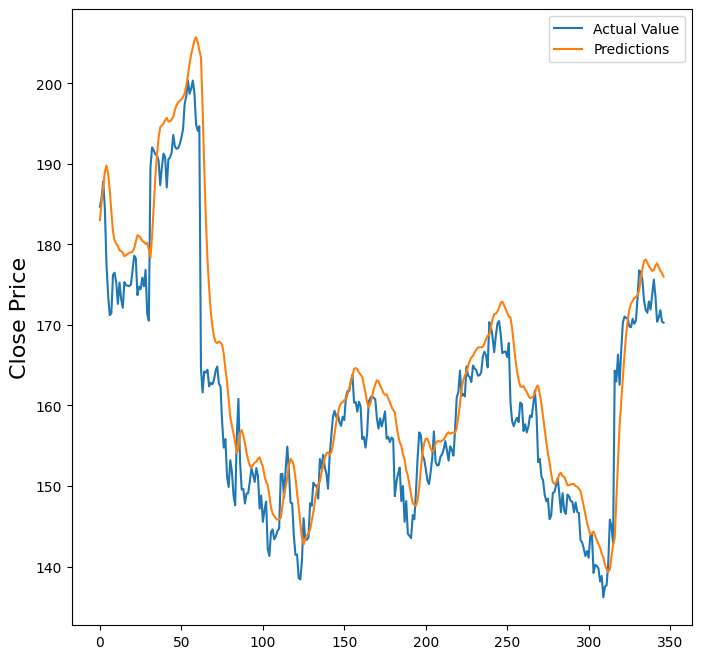

In [57]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 2. ANN

In [58]:
model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6450.7183 - val_loss: 22399.6289
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6109.9634 - val_loss: 22059.7402
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6065.0889 - val_loss: 19918.4668
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5354.1650 - val_loss: 13086.4912
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3609.3994 - val_loss: 2688.2878
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1086.7432 - val_loss: 870.6989
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 241.4976 - val_loss: 1649.9675
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 214.5496 - val_loss: 1365.3611
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215.8978 - val_loss: 1350.9824
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 201.2233 - val_loss: 1371.8733
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 197.1656 - val_loss: 1251.1260
Epoch 12/10

In [59]:
y_pred_2 = model_2.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [60]:
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.7915889645863334


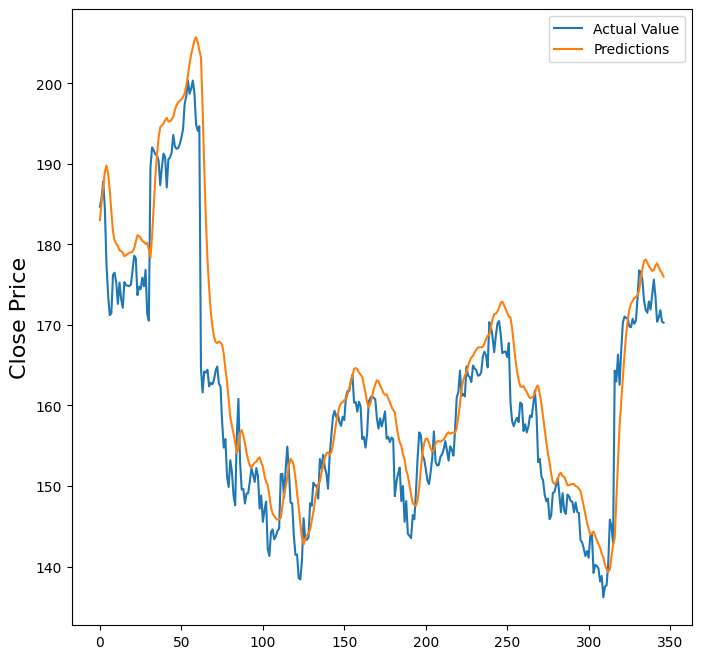

In [61]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 3. CNN

In [62]:
model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4876.0259 - val_loss: 903.7980
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 160.5477 - val_loss: 81.7250
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17.0720 - val_loss: 38.2463
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 15.0036 - val_loss: 33.8164
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14.9867 - val_loss: 31.5063
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14.1481 - val_loss: 31.1282
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.1372 - val_loss: 30.3616
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 13.3229 - val_loss: 30.2141
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.1257 - val_loss: 32.5856
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.2044 - val_loss: 30.7246
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.2946 - val_loss: 28.7586
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━

In [63]:
y_pred_3 = model_3.predict(X_test_)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [64]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,181.186813
1,185.770004,182.996307
2,187.839996,184.265076
3,184.449997,185.720993
4,177.539993,185.547775


In [ ]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()